In [39]:
# Logistic Regression Example: Multi-Feature Synthetic Classification 🎯

# ---------------------------------------------------------
# 1. Import libraries
# ---------------------------------------------------------
# numpy: For numerical computations
# matplotlib: For visualization
# sklearn.model_selection: To split into training and test sets
# sklearn.metrics: For accuracy and classification metrics
# logistic_regression: Our custom model class

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from logistic_regression import LogisticRegressionModel

In [40]:
# ---------------------------------------------------------
# Step 2: Create synthetic dataset with multiple features
# ---------------------------------------------------------

# np.random.seed(42)
# - Sets the "random seed" for reproducibility
# - Makes random numbers generated below the same every run, helpful for debugging/testing
np.random.seed(42)

# n_samples = 200
# - Number of data points (rows) in our dataset
n_samples = 200

# n_features = 4
# - Number of features (columns) per data point
n_features = 4

# -------------------------------
# Generate data points for Class 0 (label 0)
# -------------------------------

# np.random.normal(loc, scale, size)
# - Generates random numbers from a normal (Gaussian) distribution
# - loc = mean (center) of the distribution (here a list to create multi-dim data)
# - scale = standard deviation (spread) of the distribution
# - size = shape of output array (rows, columns)
X0 = np.random.normal(
    loc=[4, 4, 2, 1],      # center for each feature in class 0
    scale=6.0,             # how spread out the points are
    size=(n_samples // 2, n_features)  # half the samples for class 0
)

# y0 = np.zeros(n_samples // 2)
# - Creates an array of zeros (class label 0)
# - Length equals number of class 0 samples
y0 = np.zeros(n_samples // 2)

# -------------------------------
# Generate data points for Class 1 (label 1)
# -------------------------------

X1 = np.random.normal(
    loc=[12, 12, 6, 4],       # center for each feature in class 1
    scale=6.0,
    size=(n_samples // 2, n_features)  # other half for class 1
)

# y1 = np.ones(n_samples // 2)
# - Creates an array of ones (class label 1)
y1 = np.ones(n_samples // 2)

# -------------------------------
# Combine both classes to create the full dataset
# -------------------------------

# np.vstack([X0, X1])
# - Vertically stacks arrays (adds rows)
# - Creates one big feature matrix with shape (200, 4)
X = np.vstack([X0, X1])

# np.concatenate([y0, y1])
# - Concatenates arrays (joins labels for both classes)
y = np.concatenate([y0, y1])

# # Get the top 5 rows from X (first 5 samples)
# top_5_X = X[:5]

# # Get the bottom 5 rows from X (last 5 samples)
# bottom_5_X = X[-5:]

# # Get the top 5 labels from y
# top_5_y = y[:5]

# # Get the bottom 5 labels from y
# bottom_5_y = y[-5:]

# # Print to check
# print("Top 5 rows of X:\n", top_5_X)
# print("Bottom 5 rows of X:\n", bottom_5_X)
# print("Top 5 labels of y:\n", top_5_y)
# print("Bottom 5 labels of y:\n", bottom_5_y)

# At this point:
# X = array of shape (200, 4) → 200 samples, 4 features each
# y = array of shape (200,) → 200 labels, 0 or 1

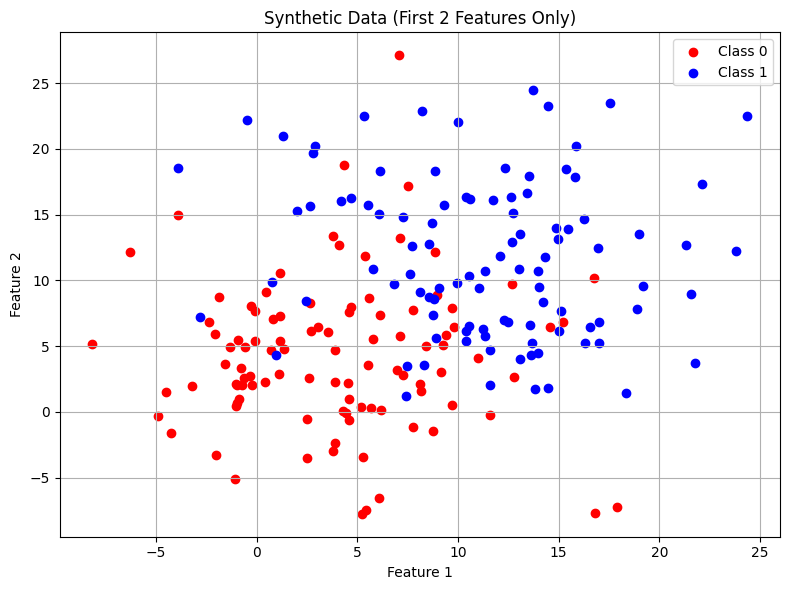

In [41]:
# ---------------------------------------------------------
# Step 3: Visualize first two features to check separation
# ---------------------------------------------------------

# plt.figure(figsize=(8, 6))
# - This creates a new blank canvas (called a "figure") where we'll draw our plot.
# - figsize=(8, 6) means the figure will be 8 inches wide and 6 inches tall.
# - This controls how big the plot window will appear.
plt.figure(figsize=(8, 6))

# plt.scatter(x, y, ...)
# - This draws a scatter plot (a set of points).
# - Each point has an x-coordinate and a y-coordinate.
# - Here we plot two groups (classes), Class 0 and Class 1, in different colors.

# Let's break down the first scatter call:
# X[y == 0, 0]
# - X is a 2D array with rows = data points and columns = features.
# - y is a 1D array with labels (0 or 1).
# - y == 0 creates a boolean mask (array of True/False), True where label is 0.
# - Using X[y == 0, 0] selects all rows in X where y is 0, and picks column 0 (the first feature).
# - So, this gives us all the values of the first feature for Class 0.

# Similarly, X[y == 0, 1] picks the second feature values for Class 0.

# These two arrays become the x and y coordinates of the points plotted in red for Class 0.
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", label="Class 0")

# The second scatter does the same for Class 1 points:
# X[y == 1, 0] → first feature values for Class 1
# X[y == 1, 1] → second feature values for Class 1
# Plotted in blue.
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", label="Class 1")

# label="Class 0"/"Class 1" lets us add a legend later, to identify which color belongs to which class.

# plt.title, plt.xlabel, plt.ylabel add text labels to the plot
plt.title("Synthetic Data (First 2 Features Only)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# plt.legend() shows the color labels on the plot
plt.legend()

# plt.grid(True) adds grid lines to make reading easier
plt.grid(True)

# plt.tight_layout() adjusts layout to avoid clipping text
plt.tight_layout()

# plt.show() displays the plot window
plt.show()


In [42]:
# ---------------------------------------------------------
# Step 4: Split data into training and test sets
# ---------------------------------------------------------

# train_test_split(X, y, test_size=0.2, random_state=42)
# - Splits X and y into training (80%) and test (20%) parts
# - test_size=0.2 means 20% of data is reserved for testing
# - random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [43]:
# ---------------------------------------------------------
# Step 5: Train Logistic Regression model
# ---------------------------------------------------------

# model = LogisticRegressionModel()
# - Create an instance (object) of our custom logistic regression class
model = LogisticRegressionModel()

# model.train(X_train, y_train)
# - Train the model on training data
# - Learns weights to separate the classes based on features
model.train(X_train, y_train)

In [ ]:
# ---------------------------------------------------------
# Step 6: Make predictions and evaluate
# ---------------------------------------------------------

# y_pred = model.predict(X_test)
# - Predict class labels (0 or 1) on the test data
y_pred = model.predict(X_test)

# y_proba = model.predict_proba(X_test)
# - Predict probabilities of belonging to each class
# - For binary classification: returns array [[prob_class_0, prob_class_1], ...]
y_proba = model.predict_proba(X_test)

# accuracy_score(y_test, y_pred)
# - Compute the fraction of correct predictions (between 0 and 1)
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.4f}")

# classification_report(y_test, y_pred)
# - Detailed metrics report: precision, recall, F1-score for each class
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))


[1. 1. 1. 1. 0.]
[0. 0. 0. 1. 1.]
[[0.00250035 0.99749965]
 [0.04623301 0.95376699]
 [0.09168027 0.90831973]
 [0.0729675  0.9270325 ]
 [0.75677809 0.24322191]]
[[0.99711155 0.00288845]
 [0.98408812 0.01591188]
 [0.77101982 0.22898018]
 [0.36577097 0.63422903]
 [0.3510499  0.6489501 ]]
✅ Accuracy: 0.9000

📋 Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90        21
         1.0       0.86      0.95      0.90        19

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



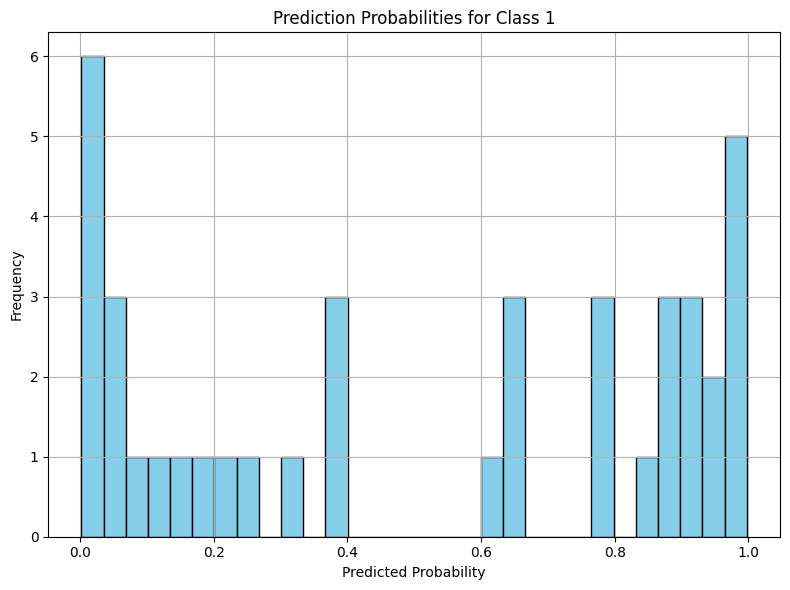

In [45]:
# ---------------------------------------------------------
# Step 7: Visualize prediction probabilities for Class 1
# ---------------------------------------------------------

plt.figure(figsize=(8, 6))

# plt.hist(data, bins, ...)
# - Histogram of prediction confidence (probability of class 1)
plt.hist(y_proba[:, 1], bins=30, color="skyblue", edgecolor="black")

plt.title("Prediction Probabilities for Class 1")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
# ---------------------------------------------------------
# Step 8: Print learned weights and bias (intercept)
# ---------------------------------------------------------

# coef, intercept = model.coefficients()
# - coef: weights for each feature, intercept: bias term (constant added)
coef, intercept = model.coefficients()

# coef.flatten()
# - Convert possibly multi-dimensional array into 1D array for easy printing
coef = coef.flatten()

print("\n⚙️ Feature Coefficients (how important each feature is):")
for i, w in enumerate(coef):
    print(f"  Feature {i + 1}: {w:.4f}")

print(f"\n🚪 Intercept (bias term): {intercept[0]:.4f}")


⚙️ Feature Coefficients (how important each feature is):
  Feature 1: 0.2725
  Feature 2: 0.2155
  Feature 3: 0.1204
  Feature 4: 0.0348

🚪 Intercept (bias term): -4.2796
